# Monte carlo simulations

### Your name      

In [1]:
#Ammar Mustufa

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<br><br>
scenario #1: Slice of a pie<br><br>

Consider a 2x2 square on the coordinate plane with corners at (-1,-1), (-1,1), (1,-1), and (1,1). <br> For each trial generate a random point inside this square (Hint: this can be done by generating two random numbers between -1 and 1.). <br>

Count how many points fall inside the unit circle (circle with a center at (0,0) and radius=1). This can be checked using the condition x^2+y^2<=1<br>

Record the ratio of number of the points inside the circle over total number of points.
<br>
Plot this ratio for 100000 trials.<br>

Also, print out the value of the last ratio multiplied by 4.<br>

Value of the last ratio multiplied by 4: 3.14008


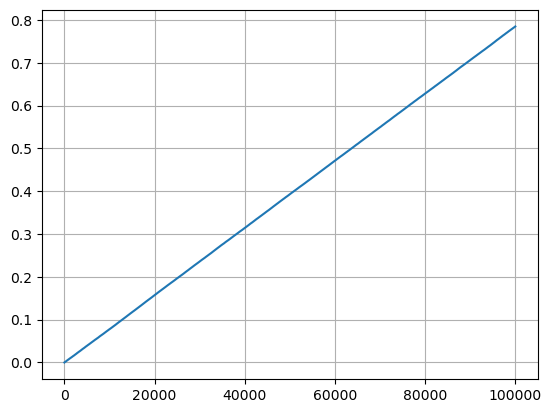

In [24]:
trials = 100000
inside = 0
ratios = []
for x in range(trials):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    if x**2 + y**2 <= 1:
        inside += 1
    new_ratio = inside / (trials)
    ratios.append(new_ratio)
final_ratio = ratios[-1] * 4
print("Value of the last ratio multiplied by 4:", final_ratio)
plt.plot(range(1, num_trials + 1), ratios)
plt.grid(True)
plt.show()


###### 

scenario #2:   A three-way tie<br><br>

The Cardinals currently have 15 wins. The Brewers have 12. The Cubs have 11. The following games are yet to be played:<br>
•The Cubs and Cardinals will play each other six more times<br>
•The Cubs will play three games against other teams (not Cardinals/Brewers)<br>
•The Brewers will play nine games against other teams (not Cubs/Cardinals)<br>

Assume the result of each game is like a coin flip: each team has a 50% chance of winning (regardless of who they are playing against).<br>
After all these games have been played, what is the probability that the Cardinals, Brewers, and Cubs all have the same number of wins?<br><br>

Write a Monte Carlo simulation with 100000 trials. (Hint: should get something close to 2.5%.)<br><br>

Tips:<br>
•For a series of games against “other teams”, you can pick at random from [1,0] to simulate the outcomes of the games.<br> 
You can let the sum of those values be the number of wins in that series.<br>
•For the Cubs vs. Cardinals series, you can once again pick at random from [1,0] to simulate the outcomes of the games. <br>
You could let the sum of those values be the number of wins by the Cubs, and 6 - sum() be the number of wins by the Cardinals.<br>
•Let cubs, brewers, and cardinals be variables containing the number of wins of each team. <br>
During each trial of the simulation, they will start out at 11, 12, and 15, respectively. <br>
Increment their values based on the number of additional wins, then use an if statement to determine if all three values are equal. <br>




In [22]:

trials = 100000
equalwins = 0
for x in range(trials):
    cubs = 11
    brewers = 12
    cardinals = 15
    cubswins = np.sum(np.random.choice([0, 1], size=6))
    cardinalswins = 6 - cubswins
    cubs += cubswins
    cardinals += cardinalswins
    cubsotherwins = np.sum(np.random.choice([0, 1], size=3))
    brewersotherwins = np.sum(np.random.choice([0, 1], size=9))
    cubs += cubsotherwins
    brewers += brewersotherwins
    if cubs == brewers == cardinals:
        equalwins += 1

probability = equalwins / trials
probability


0.02418

scenario #3:   A trivia game<br><br>

Two contestants are playing a trivia game with a total of 30 questions. After a question is asked, each contestant has to “buzz in” before answering. <br>
If the contestant wins the buzz in, and answers correctly, they win a point. <br>
If they get it wrong, the game moves to the next question (the other contestant does not get a chance to answer).<br><br> 

Assume:<br>
 • Contestant A has a probability of 80% of answering correctly, but has a 40% chance of winning the buzz in.<br> 
 • Contestant B has a probability of 50% of answering correctly, but has a 60% chance of winning the buzz in.<br>
 • Each contestant tries to buzz in for each question.<br><br>
 
Use a Monte Carlo simulation with 100,000 trials to estimate<br>
a) the probability that contestant A wins (has a score strictly larger than B); (Hint: should get something close to 51%).<br>
b) the probability that contestant B wins (has a score strictly larger than A); (Hint: should get something close to 40%).<br>
c) the probability that game ends in a tie; (Hint: should get something close to 9%.)<br><br><br>

Tips:<br>

For a game of 30 questions (a trial):<br>
1. Generate 30 random numbers (1 or 0) with appropriate probabilities. Call it buzz. <br>
If the value is 1, contestant A won the buzz for this question, if the value is 0 - contestant B won the buzz for this question. <br>
2. a. Generate 30 random numbers (1 or 0) with appropriate probabilities. Call it A_answers. <br>
      If the value is 1, contestant A knows the correct answer to this question, if the value is 0 - he/she does not know the correct answer to this question. <br>
   b. If you multiply buzz by A_answers, you'll get 1s for the questions A answered correctly. Sum of this array will be the contestant A's score.<br>
3. Repeat 2.a for contestant B. <br>
   b. mulpitly (1-buzz) by B_answers. <br>
4. Compare the contestant A's score to the contestant B's score. <br>
<br>
Repeat 1-4 steps 100,000 times.<br>



In [21]:

trials = 10000 # 100000 was taking too long
winsA = 0
winsB = 0
ties = 0
for x in range(trials):
    scoreA = 0
    scoreB = 0
    for x in range(30):
        buzzer = np.random.choice([1, 0], p=[0.4, 0.6])
        A_buzzes = np.random.choice([1, 0], p=[0.8, 0.2])
        B_buzzes = np.random.choice([1, 0], p=[0.5, 0.5])
        if buzzer == 1 and A_buzzes == 1:
            scoreA += 1
        if buzzer == 0 and B_buzzes == 1:
            scoreB += 1
    if scoreA > scoreB:
        winsA += 1
    elif scoreB > scoreA:
        winsB += 1
    elif scoreB == scoreA:
        ties += 1
probability_that_A_wins = winsA / trials
probability_that_B_wins = winsB / trials
probability_of_tie = ties / trials
print( probability_that_A_wins)
print( probability_that_B_wins)
print( probability_of_tie)


0.5046
0.4083
0.0871
